In [277]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import random
import time
from collections import deque

%matplotlib inline

# 実データを扱う場合

In [2]:
# 元データに対しては、以下の処理を行う
# # text形式の元データを読み込む
# network = pd.read_table("soc-Epinions1.txt",header=3)
# # ノードidをユニークする
# node_id = network["ToNodeId"].unique()
# # 入次数を計算する
# in_deg = []
# for i in tqdm(node_id):
#     in_deg.append(sum(network["ToNodeId"]==i))
# # ノード毎の入次数を表にまとめた
# in_deg_df = pd.DataFrame({"ToNodeId":node_id, "in_degree":in_deg})
# in_deg_df = in_deg_df.sort_values("ToNodeId").reset_index(drop=True)
# # 入次数から枝確率を計算する
# in_deg_df["p"] = 1/in_deg_df["in_degree"]
# network_p = pd.merge(network, in_deg_df, on="ToNodeId", how="left").drop(columns="in_degree")

In [169]:
# データの読み込み
# 枝確率を計算済みのネットワークを読み込む
network = pd.read_csv("data.csv")
network.head()

,# FromNodeId,ToNodeId,p
0,0,4,0.008000
1,0,5,0.005682
2,0,7,0.033333
3,0,8,0.009615
4,0,9,0.066667


In [170]:
# numpy型に変換
network_np = network.values

In [171]:
# 空の有向グラフを作成
G_real = nx.DiGraph()

In [172]:
# 重み付きの枝を加える
G_real.add_weighted_edges_from(network_np)

# 練習

In [231]:
G_practice = nx.DiGraph()

In [232]:
weighted_edges = [[0,1,0.1],
                  [0,2,0.2],
                  [1,3,0.3],
                  [1,4,0.4],
                  [2,4,0.5],
                  [2,0,0.6],
                  [3,0,0.7],
                  [3,1,0.8],
                  [4,3,0.9],
                  [4,2,1.0]
                 ]

In [233]:
G_practice.add_weighted_edges_from(weighted_edges)

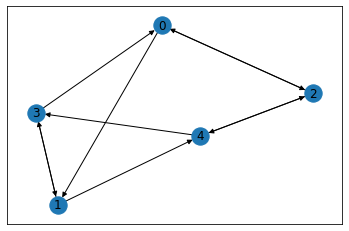

In [376]:
# ネットワークを描画できる
nx.draw_networkx(G_practice)
plt.show()

In [380]:
G_practice[3]

AtlasView({0: {'weight': 0.7}, 1: {'weight': 0.8}})

In [379]:
list(G_practice.successors(3))

[0, 1]

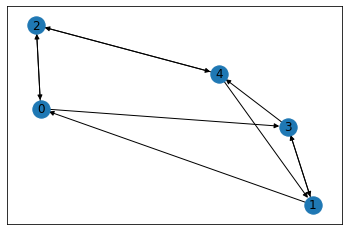

In [177]:
# ネットワークの枝の向きを逆にする
G_reverse = nx.reverse(G_practice, copy=True)
nx.draw_networkx(G_reverse)
plt.show()

In [178]:
# ノード
print(nx.nodes(G_practice))

[0, 1, 2, 3, 4]


In [179]:
# ノード数
print(nx.number_of_nodes(G_practice))

5


In [180]:
# グラフのdensity
print(nx.density(G_practice))

0.5


In [181]:
# 各ノードの入次数(ノードid,入次数)
print(G_practice.in_degree())

[(0, 2), (1, 2), (2, 2), (3, 2), (4, 2)]


In [182]:
# 各ノードの出次数(ノードid,出次数)
print(G_practice.out_degree())
# [(3, 3), (0, 3), (2, 2), (1, 2), (4, 2)]

# ノード1の出次数
# out_deg = G_practice.out_degree()
# out_deg[1]
# 2

[(0, 2), (1, 2), (2, 2), (3, 2), (4, 2)]


In [183]:
# 指定されたノードから出る枝を列挙
print(G_practice.out_edges(3))
# [(3, 0), (3, 2), (3, 1)]

print(G_practice.out_edges([3]))
# [(3, 0), (3, 2), (3, 1)]

print(G_practice.out_edges([3,2]))
# [(3, 0), (3, 2), (3, 1), (2, 0), (2, 4)]

[(3, 0), (3, 1)]
[(3, 0), (3, 1)]
[(3, 0), (3, 1), (2, 4), (2, 0)]


In [186]:
# 指定されたノードに入る枝を列挙
print(G_practice.in_edges(3))
# [(1, 3), (4, 3)]

print(G_practice.in_edges([3]))
# [(1, 3), (4, 3)]

print(G_practice.in_edges([3,2]))
# [(1, 3), (4, 3), (0, 2), (4, 2)]

[(1, 3), (4, 3)]
[(1, 3), (4, 3)]
[(1, 3), (4, 3), (0, 2), (4, 2)]


In [188]:
# (0,1)の重みを知りたい場合
print(G_practice[0][1])
# {'weight': 0.1}

{'weight': 0.1}


In [236]:
# 各ノードの次数
print(G_practice.degree)
# [(0, 4), (1, 4), (2, 4), (3, 4), (4, 4)]

[(0, 4), (1, 4), (2, 4), (3, 4), (4, 4)]


In [189]:
# ノード3のout-neighbor頂点
print(list(G_practice.successors(3)))
# [0, 1]

[0, 1]


In [190]:
# ノード3のin-neighbor頂点
print(list(G_practice.predecessors(3)))
# [1, 4]

[1, 4]


In [191]:
# ノード0からの到達可能ノードまでの最短パス
print(nx.single_source_shortest_path(G_practice, 0))
# {0: [0], 1: [0, 1], 2: [0, 2], 3: [0, 1, 3], 4: [0, 1, 4]}

{0: [0], 1: [0, 1], 2: [0, 2], 3: [0, 1, 3], 4: [0, 1, 4]}


In [192]:
# ノード0までの到達可能ノードまでの最短パス
print(nx.single_target_shortest_path(G_practice, 0))
# {0: [0], 2: [2, 0], 3: [3, 0], 4: [4, 2, 0], 1: [1, 3, 0]}

{0: [0], 2: [2, 0], 3: [3, 0], 4: [4, 2, 0], 1: [1, 3, 0]}


In [193]:
pred, dist = nx.dijkstra_predecessor_and_distance(G_practice, 0)
# ノード0から各ノードへの最短経路の一個手前のノード
print(sorted(pred.items()))
# [(0, []), (1, [0]), (2, [0]), (3, [1]), (4, [1])]

# ノード0から各頂点までの距離
print(sorted(dist.items()))
# [(0, 0), (1, 0.1), (2, 0.2), (3, 0.4), (4, 0.5)]

[(0, []), (1, [0]), (2, [0]), (3, [1]), (4, [1])]
[(0, 0), (1, 0.1), (2, 0.2), (3, 0.4), (4, 0.5)]


In [194]:
# ノード0からノード4までの最短経路 
print(nx.dijkstra_path(G_practice,0,4))
# [0, 1, 4]

[0, 1, 4]


In [196]:
# 任意のノード間についてダイクストラで計算
len_path = dict(nx.all_pairs_dijkstra(G_practice))

# ノード3から各ノードへの最短距離
print(len_path[3][0])
# {3: 0, 0: 0.7, 1: 0.7999999999999999, 2: 0.8999999999999999, 4: 1.2}

# ノード3から各ノードへの最短経路
print(len_path[3][1])
# {3: [3], 0: [3, 0], 1: [3, 0, 1], 2: [3, 0, 2], 4: [3, 0, 1, 4]}

{3: 0, 0: 0.7, 1: 0.7999999999999999, 2: 0.8999999999999999, 4: 1.2}
{3: [3], 0: [3, 0], 1: [3, 0, 1], 2: [3, 0, 2], 4: [3, 0, 1, 4]}


In [199]:
# 任意のノード間について最短距離が1以下の経路をダイクストラで計算
len_path = dict(nx.all_pairs_dijkstra(G_practice, cutoff=1))

# 上と比較すると、ノード3から4への経路が消えている
# ノード3から各ノードへの最短距離
print(len_path[3][0])
# {3: 0, 0: 0.7, 1: 0.7999999999999999, 2: 0.8999999999999999}

# ノード3から各ノードへの最短経路
print(len_path[3][1])
# {3: [3], 0: [3, 0], 1: [3, 0, 1], 2: [3, 0, 2]}

{3: 0, 0: 0.7, 1: 0.7999999999999999, 2: 0.8999999999999999}
{3: [3], 0: [3, 0], 1: [3, 0, 1], 2: [3, 0, 2]}


In [200]:
%timeit len_path = dict(nx.all_pairs_dijkstra(G_practice))
%timeit len_path = dict(nx.all_pairs_dijkstra(G_practice, cutoff=1))

# 70.7 µs ± 5.55 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
# 57.1 µs ± 461 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
# わずかに速くなっている

76.8 µs ± 3.9 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
61.5 µs ± 3.39 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [201]:
for n, (dist, path) in nx.all_pairs_dijkstra(G_practice):
    print(path.get(4))
    
# [0, 1, 4]
# [1, 4]
# [2, 4]
# [3, 0, 1, 4]
# [4]

[0, 1, 4]
[1, 4]
[2, 4]
[3, 0, 1, 4]
[4]


In [208]:
# グラフが木構造であるかどうかを判定する
print(nx.is_tree(G_practice))
# False

False


In [237]:
G_practice2 = nx.DiGraph()

weighted_edges = [[0,2,0.1],
                  [0,1,0.1],
                  [2,0,0.1],
                  [1,2,0.1],
                  [0,7,0.1],
                  [2,7,0.1],
                  [7,4,0.1],
                  [7,5,0.1],
                  [7,6,0.1],
                  [4,5,0.1],
                  [5,4,0.1],
                  [5,6,0.1],
                 ]

G_practice2.add_weighted_edges_from(weighted_edges)

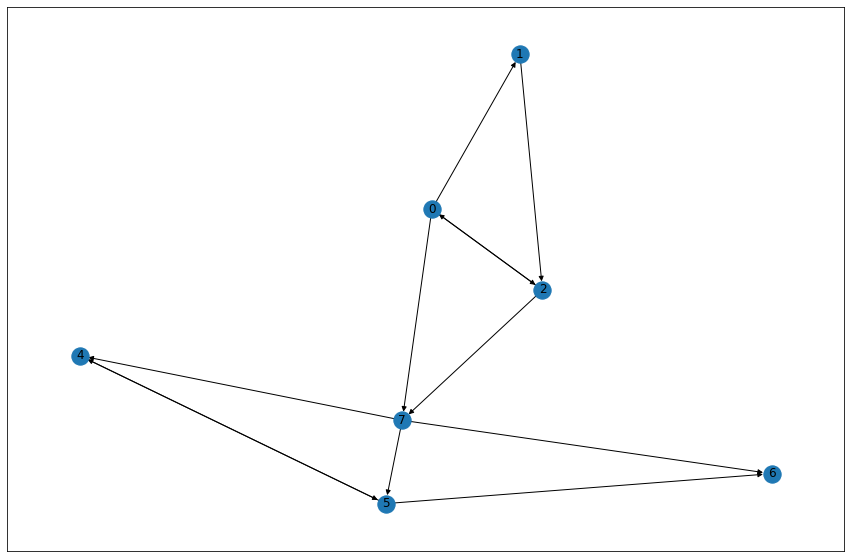

In [204]:
plt.figure(figsize=(15,10))
nx.draw_networkx(G_practice2)
plt.show()

In [271]:
# 次数最大のノード
G_practice2_deg = dict(G_practice2.degree())
print(max(G_practice2_deg, key=G_practice2_deg.get))

7


In [238]:
# 強連結成分の計算
print(list(nx.strongly_connected_components(G_practice2)))
# [{6}, {4, 5}, {7}, {0, 1, 2}]

[{6}, {4, 5}, {7}, {0, 1, 2}]


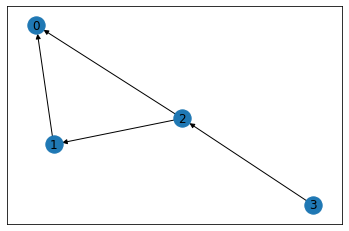

In [239]:
# グラフを縮約し、DAGを作成する
DAG = nx.condensation(G_practice2)
nx.draw_networkx(DAG)
plt.show()

In [288]:
# DAGに変換させたときに、どのノードを何に縮約したか
print(dict(DAG.nodes))
# {0: {'members': {6}}, 1: {'members': {4, 5}}, 2: {'members': {7}}, 3: {'members': {0, 1, 2}}}

{0: {'members': {6}}, 1: {'members': {4, 5}}, 2: {'members': {7}}, 3: {'members': {0, 1, 2}}}


In [310]:
dict(DAG.nodes)[1]["members"]

{4, 5}

In [304]:
# 縮約後の各強連結成分のノード数
DAG_item = dict(DAG.nodes).items()
weight_i = {node:len(list(w.values())[0]) for node, w in DAG_item}
print(weight_i)
# {0: 1, 1: 2, 2: 1, 3: 3}

{0: 1, 1: 2, 2: 1, 3: 3}


In [210]:
# 縮約がどれくらいの時間がかかるのか実データで実験してみる
%time nx.condensation(G_real)

CPU times: user 1.97 s, sys: 37.9 ms, total: 2 s
Wall time: 2.02 s


In [212]:
# 強連結成分の個数
print(len(dict(DAG.nodes)))
# 42176

42176


In [275]:
# 幅優先探索によって、Sから到達可能なノードを返す
def bfs(G, S):
    visited = {s:None for s in S}
    queue = deque(S)
    while queue:
        v = queue.popleft()
        out_node = G[v]
        for u in out_node:
            if not (u in visited):
                queue.append(u)
                visited[u] = v
    return visited

In [285]:
%timeit print(len(set(nx.dfs_preorder_nodes(G_real,source=0))))

47676
47676
47676
47676
47676
47676
47676
47676
443 ms ± 20.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [286]:
%timeit print(len(set(bfs(G_real, [0]))))

47676
47676
47676
47676
47676
47676
47676
47676
203 ms ± 21.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


自作関数の方が速い

## Gをreverseしてからbfsするのとbfs_reverse(枝を逆だと考えてbfs)のとどちらが速いか?

In [382]:
# 幅優先探索によって、Sから到達可能なノードを返す
def bfs_reverse(G, S):
    visited = {s:None for s in S}
    queue = deque(S)
    while queue:
        v = queue.popleft()
        in_node = G.predecessors(v)
        for u in in_node:
            if not (u in visited):
                queue.append(u)
                visited[u] = v
    return visited

In [383]:
%%time
G_real_reverse = nx.reverse(G_real, copy=True)
print(len(bfs(G_real_reverse, [0])))

56459
CPU times: user 5.99 s, sys: 127 ms, total: 6.12 s
Wall time: 6.13 s


In [384]:
%time print(len(bfs_reverse(G_real, [0])))

56459
CPU times: user 247 ms, sys: 5.05 ms, total: 252 ms
Wall time: 250 ms
